In [58]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as pyplot

In [7]:
#Data analyzing


ValueError: DataFrame constructor not properly called!

In [84]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


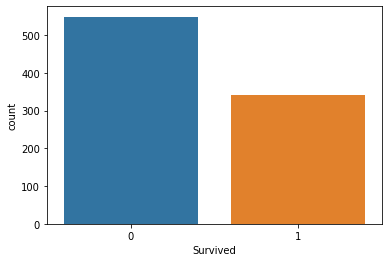

In [85]:
sns.countplot(x="Survived", data=titanic_data)

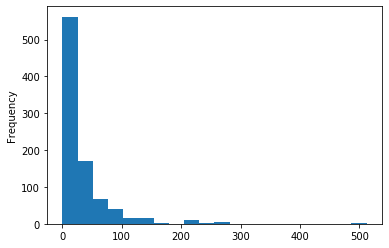

In [86]:
titanic_data["Fare"].plot.hist(bins=20)

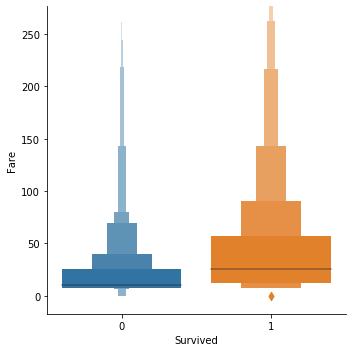

In [87]:
sns.catplot(x="Survived", y="Fare", kind="boxen",
            data=titanic_data);
#from this, you can interpret that people who spent more on their fare tend to survive.

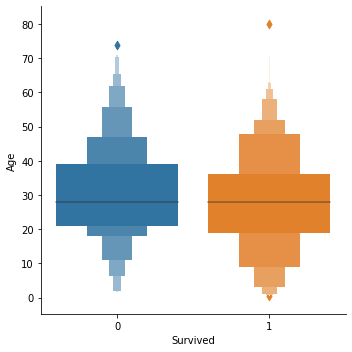

In [88]:
sns.catplot(x="Survived", y="Age", kind="boxen",
            data=titanic_data);

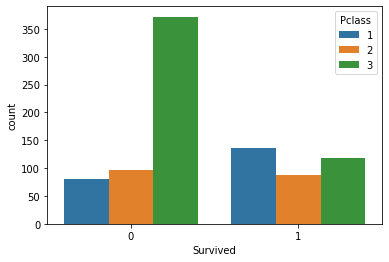

In [89]:
sns.countplot(x="Survived",hue = "Pclass",data=titanic_data)

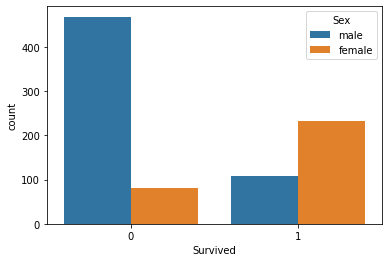

In [90]:
sns.countplot(x="Survived",hue = "Sex",data=titanic_data)
#more males died then females 
#DATA CLEANING

In [91]:
titanic_data.drop('Cabin',axis=1, inplace=True)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [93]:
print(titanic_data.isnull().sum())
titanic_data.dropna(axis=0,inplace=True)
print(len(titanic_data))


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
712


In [94]:
pd.get_dummies(titanic_data["Embarked"])
embarked = pd.get_dummies(titanic_data["Embarked"],drop_first = True)
sex = pd.get_dummies(titanic_data["Sex"],drop_first = True)
pcl = pd.get_dummies(titanic_data["Pclass"],drop_first=True)

In [95]:
titanic_data = pd.concat([titanic_data,sex,pcl,embarked],axis=1)

In [96]:
titanic_data.drop(['PassengerId', 'SibSp', 'Parch', 'Ticket', 'Name','Pclass','Embarked','Sex'],axis=1, inplace=True)


In [97]:
titanic_data

,Survived,Age,Fare,male,2,3,Q,S
0,0,22.0,7.2500,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0
2,1,26.0,7.9250,0,0,1,0,1
3,1,35.0,53.1000,0,0,0,0,1
4,0,35.0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...
885,0,39.0,29.1250,0,0,1,1,0
886,0,27.0,13.0000,1,1,0,0,1
887,1,19.0,30.0000,0,0,0,0,1
889,1,26.0,30.0000,1,0,0,0,0


In [98]:
X = titanic_data.drop("Survived",axis=1)
Y = titanic_data["Survived"]

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [100]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=0.2, random_state=0)

In [101]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()

In [102]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [103]:
param_grid = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(estimator = svc,param_grid = param_grid,scoring='accuracy',cv=10, n_jobs=-1)

In [104]:
clf.fit(train_features,train_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [105]:
print(clf.best_params_)
clf.best_score_


{'C': 1, 'kernel': 'linear'}


0.7767857142857143

In [106]:
svc = SVC(1, 'linear')
svc = svc.fit(train_features,train_labels)
predicted_labels = svc.predict(test_features)
print(classification_report(test_labels,predicted_labels))
print(accuracy_score(test_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        82
           1       0.78      0.70      0.74        61

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143

0.7902097902097902


In [107]:
from sklearn.feature_selection import RFE
from pprint import pprint
selector = RFE(rf, step=1, verbose=3)
selector = selector.fit(train_features, train_labels)
print("Features sorted by their rank:")
pprint(sorted(zip(map(lambda x: round(x, 4), selector.ranking_), X)))

Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Features sorted by their rank:
[(1, 'Age'), (1, 'Fare'), (1, 'male'), (2, 3), (3, 'S'), (4, 2), (5, 'Q')]


In [ ]:
#top features are age,fare,male, 3 is passenger class , 4 and 5 is which cabin they stayed at. 
